In [1]:
import os
path = os.path.abspath(os.path.join('..'))
print(path)
import sys

sys.path.insert(0,path)
print(sys.executable)

/home/scuervo91/dev/dcapy
/home/scuervo91/anaconda3/envs/reservoir/bin/python


In [2]:
from dcapy import dca
import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

# dcapy Basis Examples to try

## Basics Equations

First Section will explore the Arps Declination Analysis equations. 
Starting from Equations used to calculate rate then cumulatives.

The library numpy is used to performed the majority of operations

### Exponential b = 0, Examples

The time array used with this function is relative to a Initial Time which is always 0

In [3]:
time1 = [0,2,3,4,10]
qi1 = 500
di1 = 0.3 
dca.arps_exp_rate(time1,qi1,di1)

array([500.        , 274.40581805, 203.28482987, 150.59710596,
        24.89353418])

Cumulative volume can be calculated  for any timestep

In [4]:
dca.arps_exp_cumulative(time1,qi1,di1)


array([   0.        ,  751.98060651,  989.0505671 , 1164.67631348,
       1583.68821939])

### Hyperbolic 0<b<1, Examples

The time array used with this function is relative to a Initial Time which is always 0

In [5]:
b = 0.5
dca.arps_hyp_rate(time1,qi1,di1,b)

array([500.        , 295.85798817, 237.81212842, 195.3125    ,
        80.        ])

In [6]:
dca.arps_hyp_cumulative(time1,qi1,di1,b,ti=0)

array([  -0.        ,  769.23076923, 1034.48275862, 1250.        ,
       2000.        ])

### Armonic, Examples

The time array used with this function is relative to a Initial Time which is always 0

In [7]:
b = 1
dca.arps_hyp_rate(time1,qi1,di1,b)

array([500.        , 312.5       , 263.15789474, 227.27272727,
       125.        ])

In [8]:
dca.arps_arm_cumulative(time1,qi1,di1,b,ti=0)

array([   0.        ,  783.33938208, 1069.75647695, 1314.09560061,
       2310.49060187])

## Use arps_forecast and arps_cumulative 
independently of the b. It internally uses the appropiate equation

In [9]:
print('Examples Arps Forecast function')

print('Example 1. Single Values')
time1 = [0,2,4,6]
qi1 = 500,
di1 = 0.3
b1 = 0 
f1 = dca.arps_forecast(time1,qi1,di1,b1)
print('Forecast Example 1')
print(f1)


Examples Arps Forecast function
Example 1. Single Values
Forecast Example 1
[500.         274.40581805 150.59710596  82.64944411]


In [10]:
dca.arps_cumulative(time1,qi1,di1,b1)

array([   0.        ,  751.98060651, 1164.67631348, 1391.16851963])

In [11]:
print('\nExample 2. Multiple values')
time2 = [0,2,4,6]
qi2 = [600,700,900]
di2 = 0.3
b2 = [0,0.5,1]
print(f' ->Time array {time2}\n ->qi {qi2}\n -> di {di2}\n b {b2}')    
f2 = dca.arps_forecast(time2,qi2,di2,b2)
print('Forecast Example 2')
print(f2)
f2.shape


Example 2. Multiple values
 ->Time array [0, 2, 4, 6]
 ->qi [600, 700, 900]
 -> di 0.3
 b [0, 0.5, 1]
Forecast Example 2
[[600.         700.         900.        ]
 [329.28698166 414.20118343 562.5       ]
 [180.71652715 273.4375     409.09090909]
 [ 99.17933293 193.90581717 321.42857143]]


(4, 3)

In [12]:
dca.arps_cumulative(time2,qi2,di2,b2)

array([[   0.        ,   -0.        ,    0.        ],
       [ 902.37672781, 1076.92307692, 1410.01088774],
       [1397.61157618, 1750.        , 2365.37208109],
       [1669.40222356, 2210.52631579, 3088.85825154]])

In [13]:
dca.arps_rate_time([4000,5000],[0.3,0.6],[0,1],500)

array([ 6, 15])

# Arps Class

In [14]:
print('Example Arps Class')
#print(dca.time_converter_matrix)
qi = [4000,5000]
di = 0.3
b = 0
ti = 0
di_f = 'A'
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f)
print(dc)

Example Arps Class
Declination 
 Ti: 0 
 Qi: [4000.0, 5000.0] bbl/d 
 Di: 0.3 A 
 b: 0.0


Calculate Daily Basis each day


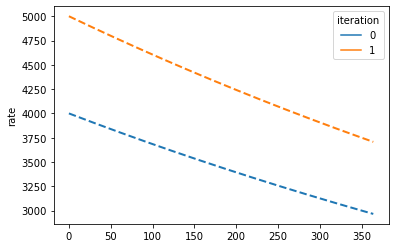

In [15]:
print('Calculate Daily Basis each day')
#print(dc.forecast(start=0,end=1000,freq_input='D',freq_output='D'))
dd = dc.forecast(start=0,end=365,freq_input='D',freq_output='D')
#print(dc.forecast(start=0,end=365,freq_input='D',freq_output='D').head(10))
dc.plot(start=0,end=365,freq_input='D',freq_output='D')

Calculate Daily Basis each Month
            rate    cumulative  iteration
0    4000.000000  0.000000e+00          0
30   3902.575918  1.185326e+05          0
60   3807.524699  2.341783e+05          0
90   3714.788549  3.470073e+05          0
120  3624.311083  4.570882e+05          0
150  3536.037288  5.644880e+05          0
180  3449.913491  6.692719e+05          0
210  3365.887327  7.715038e+05          0
240  3283.907706  8.712456e+05          0
270  3203.924783  9.685582e+05          0
300  3125.889925  1.063501e+06          0
330  3049.755686  1.156131e+06          0
360  2975.475774  1.246504e+06          0
0    5000.000000  0.000000e+00          1
30   4878.219897  1.481658e+05          1
60   4759.405873  2.927229e+05          1
90   4643.485686  4.337591e+05          1
120  4530.388854  5.713602e+05          1
150  4420.046610  7.056100e+05          1
180  4312.391864  8.365899e+05          1
210  4207.359159  9.643797e+05          1
240  4104.884633  1.089057e+06          1
2

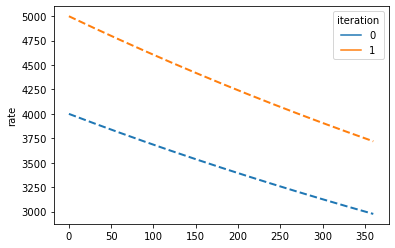

In [16]:
print('Calculate Daily Basis each Month')
print(dc.forecast(start=0,end=365,freq_input='D',freq_output='M'))
dc.plot(start=0,end=365,freq_input='D',freq_output='M',rate_kw={'color':'red'})


Calculate Daily Basis each Year
            rate    cumulative  iteration
0    4000.000000  0.000000e+00          0
365  2963.272883  1.261351e+06          0
0    5000.000000  0.000000e+00          1
365  3704.091103  1.576689e+06          1


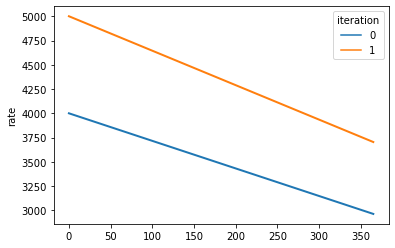

In [17]:
print('Calculate Daily Basis each Year')
print(dc.forecast(start=0,end=366,freq_input='D',freq_output='A'))
dc.plot(start=0,end=366,freq_input='D',freq_output='A',rate_kw=dict(color='blue',linestyle='-',linewidth=2))

Calculate Monthly Basis each Month
           rate    cumulative  iteration
0   4000.000000  0.000000e+00          0
1   3901.239648  1.185124e+05          0
2   3804.917698  2.340988e+05          0
3   3710.973945  3.468313e+05          0
4   3619.349672  4.567804e+05          0
5   3529.987610  5.640149e+05          0
6   3442.831906  6.686017e+05          0
7   3357.828083  7.706063e+05          0
8   3274.923012  8.700924e+05          0
9   3194.064875  9.671221e+05          0
10  3115.203132  1.061756e+06          0
11  3038.288493  1.154054e+06          0
12  2963.272883  1.244073e+06          0
0   5000.000000  0.000000e+00          1
1   4876.549560  1.481405e+05          1
2   4756.147123  2.926235e+05          1
3   4638.717432  4.335391e+05          1
4   4524.187090  5.709755e+05          1
5   4412.484513  7.050186e+05          1
6   4303.539882  8.357521e+05          1
7   4197.285104  9.632579e+05          1
8   4093.653765  1.087615e+06          1
9   3992.581094  1.208

Text(0, 0.5, 'Rate [bbl/d]')

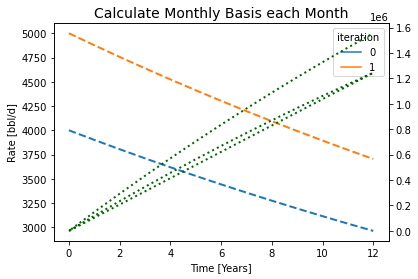

In [18]:
print('Calculate Monthly Basis each Month')
print(dc.forecast(start=0,end=13,freq_input='M',freq_output='M'))

fig, ax = plt.subplots()
dc.plot(start=0,end=13,freq_input='M',freq_output='M',cum=True,ax=ax)
ax.set_title('Calculate Monthly Basis each Month',fontsize=14)
ax.set_xlabel('Time [Years]')
ax.set_ylabel('Rate [bbl/d]')

In [19]:
print('Calculate Monthly Basis each Year')
print(dc.forecast(start=0,end=13,freq_input='M',freq_output='A'))

Calculate Monthly Basis each Year
           rate    cumulative  iteration
0   4000.000000  0.000000e+00          0
12  2963.272883  1.244073e+06          0
0   5000.000000  0.000000e+00          1
12  3704.091103  1.555091e+06          1


In [20]:
print('Calculate Year Basis each Year')
print(dc.forecast(start=0,end=2,freq_input='A',freq_output='A'))

Calculate Year Basis each Year
          rate    cumulative  iteration
0  4000.000000  0.000000e+00          0
1  2963.272883  1.261351e+06          0
0  5000.000000  0.000000e+00          1
1  3704.091103  1.576689e+06          1


In [21]:
print('Calculate Year Basis each Year - Rate Limit')
print(dc.forecast(start=0,end=15,freq_input='A',freq_output='A',rate_limit=100))


Calculate Year Basis each Year - Rate Limit
           rate    cumulative  iteration
0   4000.000000  0.000000e+00          0
1   2963.272883  1.261351e+06          0
2   2195.246544  2.195783e+06          0
3   1626.278639  2.888028e+06          0
4   1204.776848  3.400855e+06          0
5    892.520641  3.780767e+06          0
6    661.195553  4.062212e+06          0
7    489.825713  4.270712e+06          0
8    362.871813  4.425173e+06          0
9    268.822051  4.539600e+06          0
10   199.148273  4.624370e+06          0
11   147.532670  4.687169e+06          0
0   5000.000000  0.000000e+00          1
1   3704.091103  1.576689e+06          1
2   2744.058180  2.744729e+06          1
3   2032.848299  3.610035e+06          1
4   1505.971060  4.251069e+06          1
5   1115.650801  4.725958e+06          1
6    826.494441  5.077765e+06          1
7    612.282141  5.338390e+06          1
8    453.589766  5.531466e+06          1
9    336.027564  5.674500e+06          1
10   248.9353

In [22]:
inn =np.tile(np.arange(0,15),(2,1)) > 7
g=np.tile(np.arange(0,15),(2,1))
g[inn] = 100
g


array([[  0,   1,   2,   3,   4,   5,   6,   7, 100, 100, 100, 100, 100,
        100, 100],
       [  0,   1,   2,   3,   4,   5,   6,   7, 100, 100, 100, 100, 100,
        100, 100]])

In [23]:
# Custom time list
print(dc.forecast(time_list=np.array([0,5,10,18]),freq_input='M'))

           rate    cumulative  iteration
0   4000.000000  0.000000e+00          0
5   3529.987610  5.640149e+05          0
10  3115.203132  1.061756e+06          0
18  2550.512606  1.739385e+06          0
0   5000.000000  0.000000e+00          1
5   4412.484513  7.050186e+05          1
10  3894.003915  1.327195e+06          1
18  3188.140758  2.174231e+06          1


In [24]:
print('Example Arps Class estimate water rate  - Fluid Rate')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = 0
di_f = 'A'
fluid_rate = 1000
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, fluid_rate=fluid_rate)
print(dc.forecast(start=0, end=6, freq_input='M', freq_output='M'))

Example Arps Class estimate water rate  - Fluid Rate
         rate    cumulative  iteration  fluid_rate  water_rate       bsw  \
0  400.000000      0.000000          0      1000.0  600.000000  0.600000   
1  390.123965  11851.242226          0      1000.0  609.876035  0.609876   
2  380.491770  23409.876240          0      1000.0  619.508230  0.619508   
3  371.097395  34683.126562          0      1000.0  628.902605  0.628903   
4  361.934967  45678.039343          0      1000.0  638.065033  0.638065   
5  352.998761  56401.486759          0      1000.0  647.001239  0.647001   
0  500.000000      0.000000          1      1000.0  500.000000  0.500000   
1  487.654956  14814.052783          1      1000.0  512.345044  0.512345   
2  475.614712  29262.345300          1      1000.0  524.385288  0.524385   
3  463.871743  43353.908203          1      1000.0  536.128257  0.536128   
4  452.418709  57097.549178          1      1000.0  547.581291  0.547581   
5  441.248451  70501.858449        

In [25]:
print('Example Arps Class estimate water rate  - Fluid Rate')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = date(2021,2,1)
di_f = 'A'
fluid_rate = [1000,1200,1300,1200,1300,1200]
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, fluid_rate=fluid_rate)
print(dc.forecast(start=date(2021,2,1), end=date(2021,7,1), freq_output='M'))  

Example Arps Class estimate water rate  - Fluid Rate
               rate    cumulative  iteration  fluid_rate  water_rate  \
2021-02  400.000000      0.000000          0      1000.0  600.000000   
2021-03  390.899639  11072.106269          0      1200.0  809.100361   
2021-04  381.065546  23036.919336          0      1300.0  918.934454   
2021-05  371.784305  34329.094979          0      1200.0  828.215695   
2021-06  362.431108  45708.818254          0      1300.0  937.568892   
2021-07  353.603729  56448.796662          0      1200.0  846.396271   
2021-02  500.000000      0.000000          1      1000.0  500.000000   
2021-03  488.624548  13840.132836          1      1200.0  711.375452   
2021-04  476.331932  28796.149170          1      1300.0  823.668068   
2021-05  464.730382  42911.368724          1      1200.0  735.269618   
2021-06  453.038885  57136.022817          1      1300.0  846.961115   
2021-07  442.004661  70560.995827          1      1200.0  757.995339   

          

In [26]:
print('Example Arps Class estimate water rate  - bsw')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = date(2021,2,1)
di_f = 'A'
bsw = [0.1000,0.1200,0.1300,0.1200,0.1300,0.1200]
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, bsw=bsw)
print(dc.forecast(start=date(2021,2,1), end=date(2021,7,1), freq_output='M')) 

Example Arps Class estimate water rate  - bsw
               rate    cumulative  iteration   bsw  water_rate  fluid_rate  \
2021-02  400.000000      0.000000          0  0.10   44.444444  444.444444   
2021-03  390.899639  11072.106269          0  0.12   53.304496  444.204135   
2021-04  381.065546  23036.919336          0  0.13   56.940829  438.006374   
2021-05  371.784305  34329.094979          0  0.12   50.697860  422.482165   
2021-06  362.431108  45708.818254          0  0.13   54.156373  416.587481   
2021-07  353.603729  56448.796662          0  0.12   48.218690  401.822419   
2021-02  500.000000      0.000000          1  0.10   55.555556  555.555556   
2021-03  488.624548  13840.132836          1  0.12   66.630620  555.255169   
2021-04  476.331932  28796.149170          1  0.13   71.176036  547.507968   
2021-05  464.730382  42911.368724          1  0.12   63.372325  528.102707   
2021-06  453.038885  57136.022817          1  0.13   67.695466  520.734351   
2021-07  442.00466

In [27]:
print('Example Arps Class estimate water rate  - Fluid Rate')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = 0
di_f = 'A'
bsw = 0.5
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, bsw=fluid_rate)
print(dc.forecast(start=0, end=6, freq_input='D',freq_output='D')) 

Example Arps Class estimate water rate  - Fluid Rate
         rate   cumulative  iteration     bsw  water_rate  fluid_rate  \
0  400.000000     0.000000          0  1000.0 -400.400400   -0.400400   
1  399.671368   399.835661          0  1200.0 -400.004705   -0.333337   
2  399.343006   799.342826          0  1300.0 -399.650429   -0.307423   
3  399.014914  1198.521763          0  1200.0 -399.347703   -0.332790   
4  398.687091  1597.372743          0  1300.0 -398.994009   -0.306918   
5  398.359538  1995.896035          0  1200.0 -398.691781   -0.332243   
0  500.000000     0.000000          1  1000.0 -500.500501   -0.500501   
1  499.589210   499.794577          1  1200.0 -500.005882   -0.416672   
2  499.178757   999.178532          1  1300.0 -499.563037   -0.384279   
3  498.768642  1498.152204          1  1200.0 -499.184629   -0.415987   
4  498.358864  1996.715929          1  1300.0 -498.742512   -0.383648   
5  497.949422  2494.870043          1  1200.0 -498.364726   -0.415304  

In [28]:
print('Example Arps Class estimate water rate  - bsw')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = date(2021,2,1)
di_f = 'A'
wor = 2
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, wor=wor)
print(dc.forecast(start=date(2021,2,1), end=date(2021,7,1), freq_output='M'))

Example Arps Class estimate water rate  - bsw
               rate    cumulative  iteration  wor       bsw   water_rate  \
2021-02  400.000000      0.000000          0  2.0  0.666667   800.000000   
2021-03  390.899639  11072.106269          0  2.0  0.666667   781.799277   
2021-04  381.065546  23036.919336          0  2.0  0.666667   762.131092   
2021-05  371.784305  34329.094979          0  2.0  0.666667   743.568611   
2021-06  362.431108  45708.818254          0  2.0  0.666667   724.862217   
2021-07  353.603729  56448.796662          0  2.0  0.666667   707.207458   
2021-02  500.000000      0.000000          1  2.0  0.666667  1000.000000   
2021-03  488.624548  13840.132836          1  2.0  0.666667   977.249097   
2021-04  476.331932  28796.149170          1  2.0  0.666667   952.663864   
2021-05  464.730382  42911.368724          1  2.0  0.666667   929.460764   
2021-06  453.038885  57136.022817          1  2.0  0.666667   906.077771   
2021-07  442.004661  70560.995827         

In [29]:
print('Example Arps Class estimate water rate  - Fluid Rate')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = 0
di_f = 'A'
wor = [10,11,12,13,14,15]
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, wor=wor)
print(dc.forecast(start=0, end=6, freq_input='D',freq_output='D')) 

Example Arps Class estimate water rate  - Fluid Rate
         rate   cumulative  iteration   wor       bsw   water_rate  \
0  400.000000     0.000000          0  10.0  0.909091  4000.000000   
1  399.671368   399.835661          0  11.0  0.916667  4396.385047   
2  399.343006   799.342826          0  12.0  0.923077  4792.116071   
3  399.014914  1198.521763          0  13.0  0.928571  5187.193877   
4  398.687091  1597.372743          0  14.0  0.933333  5581.619273   
5  398.359538  1995.896035          0  15.0  0.937500  5975.393063   
0  500.000000     0.000000          1  10.0  0.909091  5000.000000   
1  499.589210   499.794577          1  11.0  0.916667  5495.481309   
2  499.178757   999.178532          1  12.0  0.923077  5990.145088   
3  498.768642  1498.152204          1  13.0  0.928571  6483.992346   
4  498.358864  1996.715929          1  14.0  0.933333  6977.024091   
5  497.949422  2494.870043          1  15.0  0.937500  7469.241328   

    fluid_rate     water_cum     flu

In [30]:
print('Example Arps Class estimate water rate  - Fluid Rate')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = 0
di_f = 'A'
wor = [10,11,12,13,14,15]
glr = 0.5
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, wor=wor, glr=glr)
print(dc.forecast(start=0, end=6, freq_input='D',freq_output='D')) 

Example Arps Class estimate water rate  - Fluid Rate
         rate   cumulative  iteration   wor       bsw   water_rate  \
0  400.000000     0.000000          0  10.0  0.909091  4000.000000   
1  399.671368   399.835661          0  11.0  0.916667  4396.385047   
2  399.343006   799.342826          0  12.0  0.923077  4792.116071   
3  399.014914  1198.521763          0  13.0  0.928571  5187.193877   
4  398.687091  1597.372743          0  14.0  0.933333  5581.619273   
5  398.359538  1995.896035          0  15.0  0.937500  5975.393063   
0  500.000000     0.000000          1  10.0  0.909091  5000.000000   
1  499.589210   499.794577          1  11.0  0.916667  5495.481309   
2  499.178757   999.178532          1  12.0  0.923077  5990.145088   
3  498.768642  1498.152204          1  13.0  0.928571  6483.992346   
4  498.358864  1996.715929          1  14.0  0.933333  6977.024091   
5  497.949422  2494.870043          1  15.0  0.937500  7469.241328   

    fluid_rate     water_cum     flu

## Using Arps with dates

In [31]:
print('Example Arps Class')
#print(dca.time_converter_matrix)
qi = 5000
di = 0.3
b = 0
ti = date(2021,1,1)
di_f = 'A'
dc1 = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f)
print(dc1)

Example Arps Class
Declination 
 Ti: 2021-01-01 
 Qi: 5000.0 bbl/d 
 Di: 0.3 A 
 b: 0.0


Text(0, 0.5, 'Rate [bbl/d]')

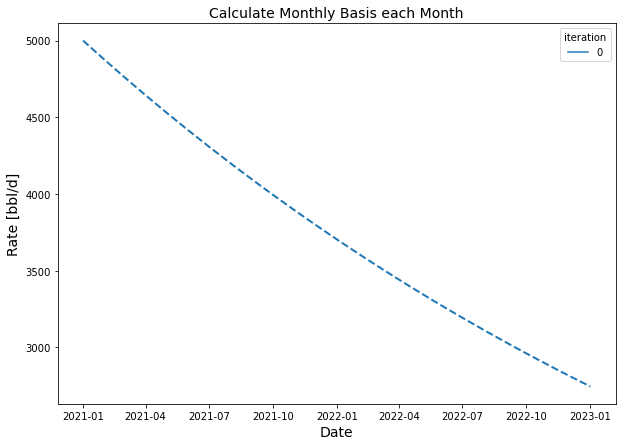

In [32]:
from_time = date(2021,1,1)
to_time = date(2023,1,1)



fig, ax = plt.subplots(figsize=(10,7))
dc1.plot(start=from_time,end=to_time,ax=ax)
ax.set_title('Calculate Monthly Basis each Month',fontsize=14)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Rate [bbl/d]',fontsize=14)

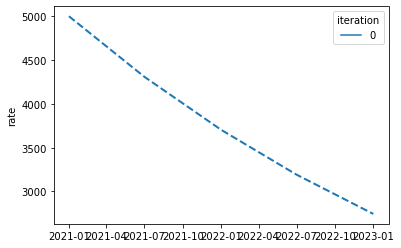

In [33]:
dc1.plot(start=from_time,end=to_time,freq_output='6M')

In [34]:
dc1.forecast(start=from_time,end=to_time,freq_output='6M')

,rate,cumulative,iteration
2021-01,5000.000000,0.000000e+00,0
2021-07,4308.848888,8.409005e+05,0
2022-01,3704.091103,1.576689e+06,0
2022-07,3192.073767,2.199644e+06,0
2023-01,2744.058180,2.744729e+06,0


In [35]:
dc1.forecast(start=from_time,end=to_time,freq_output='A')

,rate,cumulative,iteration
2021,5000.000000,0.000000e+00,0
2022,3704.091103,1.576689e+06,0
2023,2744.058180,2.744729e+06,0


In [36]:
dca.time_converter_matrix

to,A,D,M
from,,,
A,1.0,0.002740,0.083333
D,365.0,1.000000,30.000000
M,12.0,0.033333,1.000000


In [37]:
times = np.array([date(2021,1,1), date(2021,2,5), date(2021,6,17),date(2098,8,21)], dtype='datetime64')
print(times)
dc1.forecast(time_list=times)

['2021-01-01' '2021-02-05' '2021-06-17' '2098-08-21']


,rate,cumulative,iteration
2021-01,5.000000e+03,0.000000e+00,0
2021-02,4.874212e+03,1.530420e+05,0
2021-06,4.416415e+03,7.100282e+05,0
2098-08,3.839821e-07,6.083333e+06,0


In [38]:
print('Example Arps Class with probabilistic methods')
#print(dca.time_converter_matrix)
qi = stats.norm(loc=5000,scale=500)
di = 0.3
b = 0
ti = date(2021,1,1)
di_f = 'A'
dc2 = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f)
print(dc2)

Example Arps Class with probabilistic methods
Declination 
 Ti: 2021-01-01 
 Qi: <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0652f19940> bbl/d 
 Di: 0.3 A 
 b: 0.0


In [39]:
dc2.forecast(start=date(2021,1,1), end=date(2022,1,1), iter=2, rate_limit=4200)

,rate,cumulative,iteration
2021-01,5045.307932,0.000000,0
2021-02,4918.380143,154428.810621,0
2021-03,4806.482552,290570.879649,0
2021-04,4685.563033,437689.627147,0
2021-05,4571.441364,576537.658276,0
2021-06,4456.434915,716462.170737,0
2021-07,4347.893895,848520.412072,0
2021-08,4238.511362,981602.493863,0
2021-01,5028.452745,0.000000,1
2021-02,4901.948991,153912.900284,1


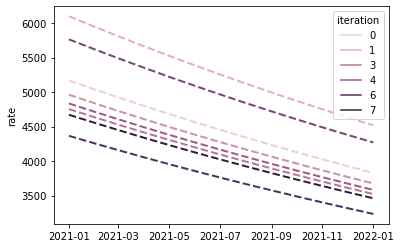

In [40]:
dc2.plot(start=date(2021,1,1), end=date(2022,1,1), iter=8)

In [41]:
print('Example Arps Class with probabilistic methods')
#print(dca.time_converter_matrix)
qi = 1000
di = 0.6
b = stats.uniform(loc=0,scale=1)
ti = date(2021,1,1)
di_f = 'A'
dc3 = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f)
print(dc3)

Example Arps Class with probabilistic methods
Declination 
 Ti: 2021-01-01 
 Qi: 1000.0 bbl/d 
 Di: 0.6 A 
 b: <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0652f19dc0>


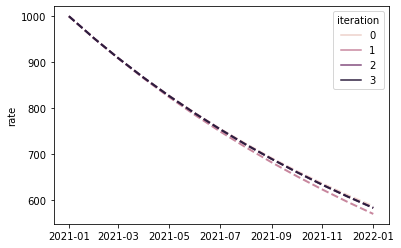

In [42]:
dc3.plot(start=date(2021,1,1), end=date(2022,1,1), iter=4)

In [43]:
dc3.dict()

{'qi': 1000.0,
 'di': 0.6,
 'b': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f0652f19dc0>,
 'ti': datetime.date(2021, 1, 1),
 'freq_di': <FreqEnum.A: 'A'>,
 'seed': None,
 'fluid_rate': None,
 'bsw': None,
 'wor': None,
 'gor': None,
 'glr': None}